In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df_kbli_real = pd.read_csv('../dataset/clean_sak_occupation_kalteng.csv',dtype={"kbli_code": str, "kbli_label": str, "kbji_code": str, "kbji_label": str})

# Salin kolom yang dibutuhkan untuk klasifikasi KBLI
df_kbli = df_kbli_real[["text_description", "kbli_code"]].dropna()
# Tampilkan hasil
df_kbli.head(10)
# Pastikan kode dalam bentuk string agar bisa di-slice
df_kbli["kbli_code"] = df_kbli["kbli_code"].astype(str).str.strip()

# Hanya ambil kode dengan minimal 4 digit untuk latihan hierarki (misalnya 1262 atau 12620)
#df_kbli = df_kbli[df_kbli["kbli_code"].str.len() >= 4]

# Buat label hierarkis: 2-digit, 3-digit, dan full
df_kbli["label_lvl1"] = df_kbli["kbli_code"].str[:1]
df_kbli["label_lvl2"] = df_kbli["kbli_code"].str[:2]
df_kbli["label_lvl3"] = df_kbli["kbli_code"].str[:3]


# Label Encoding per level
le_lvl1 = LabelEncoder()
le_lvl2 = LabelEncoder()
le_lvl3 = LabelEncoder()

df_kbli["lvl1_id"] = le_lvl1.fit_transform(df_kbli["label_lvl1"])
df_kbli["lvl2_id"] = le_lvl2.fit_transform(df_kbli["label_lvl2"])
df_kbli["lvl3_id"] = le_lvl3.fit_transform(df_kbli["label_lvl3"])

df_kbli.head(10)


,text_description,kbli_code,label_lvl1,label_lvl2,label_lvl3,lvl1_id,lvl2_id,lvl3_id
0,Aktivitas: Karyawan panen kelapa sawit di kebu...,01262,0,01,012,0,0,1
1,"Aktivitas: Karyawan perawatan (memupuk, nyempr...",01262,0,01,012,0,0,1
2,Aktivitas: Ketua koperasi kelompok tani mitra ...,01262,0,01,012,0,0,1
3,"Aktivitas: Merawat, membersihkan, memupuk kebu...",01262,0,01,012,0,0,1
4,Aktivitas: Pemilik dan penjual hasil kebun kel...,01262,0,01,012,0,0,1
5,Aktivitas: Membantu suami mengurus kebun kepa ...,01262,0,01,012,0,0,1
6,Aktivitas: Pemilik dan penjual kebutuhan rumah...,47599,4,47,475,4,34,78
7,Aktivitas: Pemilik toko kelontong dan sembako....,47112,4,47,471,4,34,74
8,Aktivitas: Mandor karyawan perawatan kebun kel...,01262,0,01,012,0,0,1
9,"Aktivitas: Karyawan perawatan (Memupuk, meneba...",01262,0,01,012,0,0,1


In [2]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")


In [3]:
list_of_texts = df_kbli["text_description"].tolist()
print(list_of_texts)
tokenized = tokenizer(
    list_of_texts,
    padding="max_length",
    truncation=True,
    max_length=128,
    return_tensors="pt"
)


['Aktivitas: Karyawan panen kelapa sawit di kebun pt. Sampoerna agro. Produk: Buah kelapa sawit. Usaha: Perkebunan kelapa sawit pt sampoerna agro.', 'Aktivitas: Karyawan perawatan (memupuk, nyemprot, menebas) di perkebunan kelapa sawit milik pt sampoerna agro. Produk: Buah kelapa sawit. Usaha: Perkebunan kelapa sawit pt. Sampoerna agro.', 'Aktivitas: Ketua koperasi kelompok tani mitra terpadu iv. Produk: Pengelolaan kebun plasma kelompok tani mitra terpadu iv. Usaha: Koperasi/ mitra perkebunan kelapa sawit pt sampoerna agro dengan kelompok tani/masyarakat.', 'Aktivitas: Merawat, membersihkan, memupuk kebun sawit milik orang. Produk: Buah kelapa sawit. Usaha: Pekerja di perkebunan kelapa sawit milik orang.', 'Aktivitas: Pemilik dan penjual hasil kebun kelapa sawit. Produk: Buah kelapa sawit. Usaha: Perkebunan kelapa sawit milik pribadi.', 'Aktivitas: Membantu suami mengurus kebun kepa sawit milik pribadi. Produk: Buah kelapa sawit. Usaha: Perkebunan kelapa sawit milik pribadi.', 'Aktivi

In [4]:
# Print input IDs
print(tokenized['input_ids'])

# Convert tensor to list before converting to tokens
tokens = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0].tolist())
print(tokens)

# Or if you want to see the decoded text directly
print(tokenizer.decode(tokenized['input_ids'][0]))

tensor([[    2,  2310, 30472,  ...,     0,     0,     0],
        [    2,  2310, 30472,  ...,     0,     0,     0],
        [    2,  2310, 30472,  ...,     0,     0,     0],
        ...,
        [    2,  2310, 30472,  ...,     0,     0,     0],
        [    2,  2310, 30472,  ...,     0,     0,     0],
        [    2,  2310, 30472,  ...,     0,     0,     0]])
['[CLS]', 'aktivitas', ':', 'karyawan', 'panen', 'kelapa', 'sawit', 'di', 'kebun', 'pt', '.', 'sampoerna', 'agro', '.', 'produk', ':', 'buah', 'kelapa', 'sawit', '.', 'usaha', ':', 'perkebunan', 'kelapa', 'sawit', 'pt', 'sampoerna', 'agro', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD

In [5]:
### split training and testing data

from sklearn.model_selection import train_test_split

X_ids_train, X_ids_test, X_mask_train, X_mask_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(
    tokenized["input_ids"],
    tokenized["attention_mask"],
    df_kbli["lvl1_id"].values,
    df_kbli["lvl2_id"].values,
    df_kbli["lvl3_id"].values,
    test_size=0.2,
    random_state=42)

### Make Pytorch Dataset

In [6]:
#Custom Dataset Class

from torch.utils.data import Dataset
import torch

class KBLIDataset(Dataset):
    def __init__(self,input_ids,attention_mask,y1,y2,y3):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.y1 =torch.tensor(y1,dtype=torch.long)
        self.y2 =torch.tensor(y2,dtype=torch.long)
        self.y3 =torch.tensor(y3,dtype=torch.long)

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self,idx):
        return {
            "input_ids": self.input_ids[idx],
            "attention_mask": self.attention_mask[idx],
            "label_lvl1": self.y1[idx],
            "label_lvl2": self.y2[idx],
            "label_lvl3": self.y3[idx]
        }

In [7]:
y1_train = y1_train.astype(int)
y2_train = y2_train.astype(int)
y3_train = y3_train.astype(int)

y1_test = y1_test.astype(int)
y2_test = y2_test.astype(int)
y3_test = y3_test.astype(int)



In [8]:
print(y1_train[:5], y1_train.dtype)
print(type(y1_train), y1_train.shape)


[0 4 5 1 0] int64
<class 'numpy.ndarray'> (9393,)


In [9]:
from torch.utils.data import DataLoader

train_dataset = KBLIDataset(X_ids_train, X_mask_train, y1_train, y2_train, y3_train)
test_dataset = KBLIDataset(X_ids_test, X_mask_test, y1_test, y2_test, y3_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)


In [10]:
batch = next(iter(train_loader))
print(batch["input_ids"].shape)
print(batch["label_lvl3"])

output = batch["label_lvl3"][:5].cpu().numpy()
print(le_lvl3.inverse_transform(output))

torch.Size([16, 128])
tensor([  0,  94,   1, 138,  56,  59,   1,  74,  28,  84,  96,   1,  56,   1,
          1, 141])
['011' '561' '012' '841' '410']


## Build model

In [11]:
import torch.nn as nn
from transformers import AutoModel

class HierarchicalKBLIClassifier(nn.Module):
    def __init__(self, pretrained_model_name, n_lvl1, n_lvl2, n_lvl3):
        super().__init__()
        self.encoder = AutoModel.from_pretrained(pretrained_model_name)
        hidden_size = self.encoder.config.hidden_size

        self.fc_lvl1 = nn.Linear(hidden_size, n_lvl1)
        self.fc_lvl2 = nn.Linear(hidden_size, n_lvl2)
        self.fc_lvl3 = nn.Linear(hidden_size, n_lvl3)

    def forward(self, input_ids, attention_mask):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.pooler_output  # ambil representasi token [CLS]
        out_lvl1 = self.fc_lvl1(cls_output)
        out_lvl2 = self.fc_lvl2(cls_output)
        out_lvl3 = self.fc_lvl3(cls_output)
        return out_lvl1, out_lvl2, out_lvl3


In [14]:
import torch
# Remove this line:
# from transformers import AdamW
from torch.optim import AdamW

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = HierarchicalKBLIClassifier(
    pretrained_model_name="indobenchmark/indobert-base-p1",
    n_lvl1=len(le_lvl1.classes_),
    n_lvl2=len(le_lvl2.classes_),
    n_lvl3=len(le_lvl3.classes_)
).to(device)

# Loss untuk masing-masing level (klasifikasi)
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

c:\Users\Najwa\miniconda3\envs\tab_transformer\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Najwa\.cache\huggingface\hub\models--indobenchmark--indobert-base-p1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

In [15]:
from tqdm import tqdm
import torch.nn.functional as F

def train(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0

    for batch in tqdm(dataloader, desc="Training"):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        y1 = batch["label_lvl1"].to(device)
        y2 = batch["label_lvl2"].to(device)
        y3 = batch["label_lvl3"].to(device)

        optimizer.zero_grad()

        # Forward pass
        out1, out2, out3 = model(input_ids, attention_mask)

        # Hitung loss per level
        loss1 = criterion(out1, y1)
        loss2 = criterion(out2, y2)
        loss3 = criterion(out3, y3)

        # Gabungkan loss (bobot bisa disesuaikan)
        loss = 0.2 * loss1 + 0.3 * loss2 + 0.5 * loss3

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)


In [16]:
def evaluate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            y1 = batch["label_lvl1"].to(device)
            y2 = batch["label_lvl2"].to(device)
            y3 = batch["label_lvl3"].to(device)

            out1, out2, out3 = model(input_ids, attention_mask)

            loss1 = criterion(out1, y1)
            loss2 = criterion(out2, y2)
            loss3 = criterion(out3, y3)

            loss = 0.2 * loss1 + 0.3 * loss2 + 0.5 * loss3
            total_loss += loss.item()

    return total_loss / len(dataloader)


In [18]:
n_epochs = 5
for epoch in range(n_epochs):
    train_loss = train(model, train_loader, optimizer, criterion, device)
    val_loss = evaluate(model, test_loader, criterion, device)

    print(f"Epoch {epoch+1}/{n_epochs}")
    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")


Training:   1%|          | 5/588 [02:20<4:32:16, 28.02s/it]


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_accuracy(model, dataloader, device):
    model.eval()
    all_preds_lvl1, all_preds_lvl2, all_preds_lvl3 = [], [], []
    all_labels_lvl1, all_labels_lvl2, all_labels_lvl3 = [], [], []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            y1 = batch["label_lvl1"].to(device)
            y2 = batch["label_lvl2"].to(device)
            y3 = batch["label_lvl3"].to(device)

            out1, out2, out3 = model(input_ids, attention_mask)

            pred1 = out1.argmax(dim=1)
            pred2 = out2.argmax(dim=1)
            pred3 = out3.argmax(dim=1)

            all_preds_lvl1.extend(pred1.cpu().tolist())
            all_preds_lvl2.extend(pred2.cpu().tolist())
            all_preds_lvl3.extend(pred3.cpu().tolist())

            all_labels_lvl1.extend(y1.cpu().tolist())
            all_labels_lvl2.extend(y2.cpu().tolist())
            all_labels_lvl3.extend(y3.cpu().tolist())

    acc1 = accuracy_score(all_labels_lvl1, all_preds_lvl1)
    acc2 = accuracy_score(all_labels_lvl2, all_preds_lvl2)
    acc3 = accuracy_score(all_labels_lvl3, all_preds_lvl3)

    print(f"Akurasi Level 1 (2 digit): {acc1:.4f}")
    print(f"Akurasi Level 2 (3 digit): {acc2:.4f}")
    print(f"Akurasi Level 3 (5 digit): {acc3:.4f}")
    
    return all_preds_lvl3, all_labels_lvl3


In [ ]:
# Ambil hasil prediksi & label asli level 3
preds, trues = evaluate_accuracy(model, test_loader, device)

# Ubah kembali ke kode KBLI asli
decoded_preds = le_lvl3.inverse_transform(preds)
decoded_trues = le_lvl3.inverse_transform(trues)

# Tampilkan beberapa hasil
for i in range(10):
    print(f"Prediksi: {decoded_preds[i]} \t Label Asli: {decoded_trues[i]}")


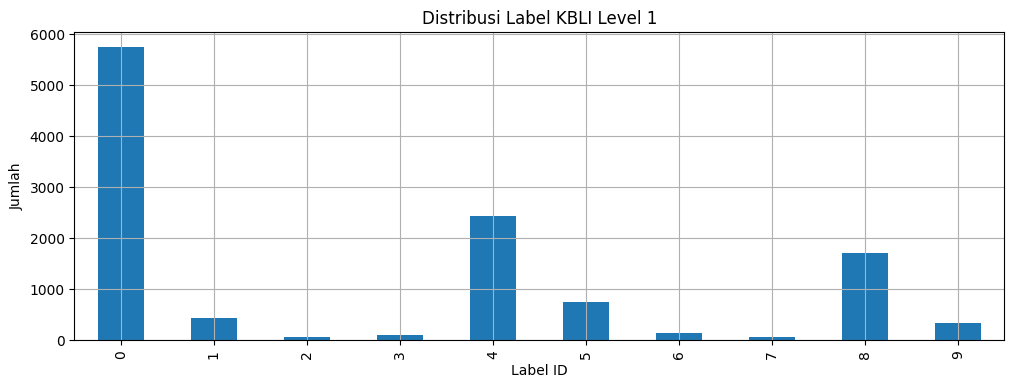

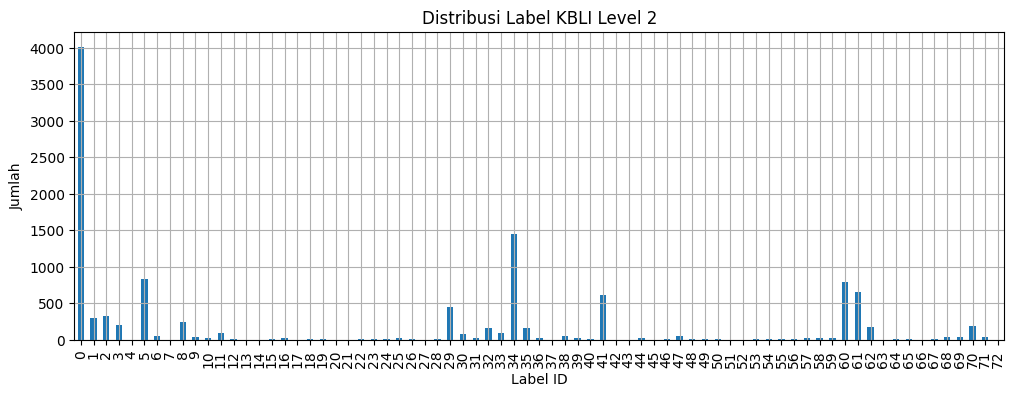

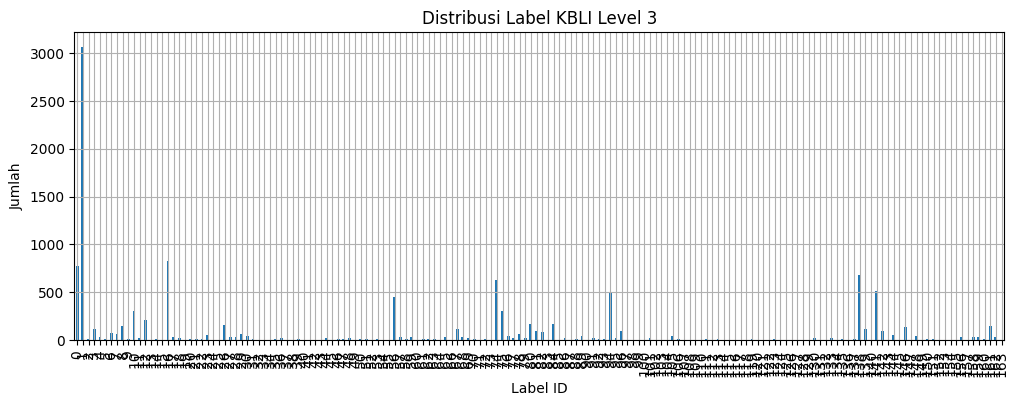

In [21]:
import matplotlib.pyplot as plt

def plot_label_distribution(df, label_column, title):
    df[label_column].value_counts().sort_index().plot(kind='bar', figsize=(12, 4))
    plt.title(title)
    plt.xlabel("Label ID")
    plt.ylabel("Jumlah")
    plt.grid(True)
    plt.show()

plot_label_distribution(df_kbli, "lvl1_id", "Distribusi Label KBLI Level 1")
plot_label_distribution(df_kbli, "lvl2_id", "Distribusi Label KBLI Level 2")
plot_label_distribution(df_kbli, "lvl3_id", "Distribusi Label KBLI Level 3")
